Today I will be looking at census data from SF. I am specifically looking at data related to health insurance. 

To start, I will import pandas and geopandas for the exercise and import the csv file containing the census data.

In [2]:
import pandas as pd
import geopandas as gpd

In [4]:
df = pd.read_csv('week03 data/R13284846_SL140.csv')

## PRELIMINARY DATA INSPECTION ##

I will run a few commands to become more familiar with the data set.

In [6]:
df.shape

(244, 109)

In [7]:
df.head()

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,...,PCT_SE_A20002_015,PCT_SE_A20002_016,PCT_SE_A20002_018,PCT_SE_A20002_019,PCT_SE_A20002_020,PCT_SE_A20002_021,PCT_SE_A20002_023,PCT_SE_A20002_024,PCT_SE_A20002_025,PCT_SE_A20002_026
0,6075010101,"Census Tract 101.01, San Francisco County, Cal...",ACSSF,ca,140,0,9875,NaN,NaN,NaN,...,3.99,96.01,6.06,93.94,4.64,89.30,0.0,100.0,100.00,24.45
1,6075010102,"Census Tract 101.02, San Francisco County, Cal...",ACSSF,ca,140,0,9876,NaN,NaN,NaN,...,14.71,85.29,0.00,100.00,36.85,63.15,0.0,100.0,100.00,41.09
2,6075010201,"Census Tract 102.01, San Francisco County, Cal...",ACSSF,ca,140,0,9877,NaN,NaN,NaN,...,0.00,100.00,1.86,98.14,0.00,98.14,0.0,100.0,97.53,77.57
3,6075010202,"Census Tract 102.02, San Francisco County, Cal...",ACSSF,ca,140,0,9878,NaN,NaN,NaN,...,3.27,100.00,0.00,100.00,5.80,95.52,0.0,100.0,100.00,49.27
4,6075010300,"Census Tract 103, San Francisco County, Califo...",ACSSF,ca,140,0,9879,NaN,NaN,NaN,...,0.00,96.06,0.00,100.00,6.18,95.02,0.0,100.0,100.00,42.43


I am now going to explore the Geo FIPS column because this is the column that contains the census tract information. I will check to make sure the tracts all have leading zeros, and if not, I will remedy that.

In [8]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 109 columns):
 #    Column             Non-Null Count  Dtype  
---   ------             --------------  -----  
 0    Geo_FIPS           244 non-null    int64  
 1    Geo_QName          244 non-null    object 
 2    Geo_FILEID         244 non-null    object 
 3    Geo_STUSAB         244 non-null    object 
 4    Geo_SUMLEV         244 non-null    int64  
 5    Geo_GEOCOMP        244 non-null    int64  
 6    Geo_LOGRECNO       244 non-null    int64  
 7    Geo_US             0 non-null      float64
 8    Geo_REGION         0 non-null      float64
 9    Geo_DIVISION       0 non-null      float64
 10   Geo_STATECE        0 non-null      float64
 11   Geo_STATE          244 non-null    int64  
 12   Geo_COUNTY         244 non-null    int64  
 13   Geo_COUSUB         0 non-null      float64
 14   Geo_PLACE          0 non-null      float64
 15   Geo_TRACT          244 non-null    int64  
 16   Geo_BL

In [9]:
df.Geo_FIPS.head()

0    6075010101
1    6075010102
2    6075010201
3    6075010202
4    6075010300
Name: Geo_FIPS, dtype: int64

This data set does not include leading zeros, and in order for Python to know that these are census tracts, I will need to fix/include the leading zeros.

In [10]:
df = pd.read_csv(
    'week03 data/R13284846_SL140.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)

In [11]:
df.head

<bound method NDFrame.head of         Geo_FIPS                                          Geo_QName  \
0    06075010101  Census Tract 101.01, San Francisco County, Cal...   
1    06075010102  Census Tract 101.02, San Francisco County, Cal...   
2    06075010201  Census Tract 102.01, San Francisco County, Cal...   
3    06075010202  Census Tract 102.02, San Francisco County, Cal...   
4    06075010300  Census Tract 103, San Francisco County, Califo...   
..           ...                                                ...   
239  06075980501  Census Tract 9805.01, San Francisco County, Ca...   
240  06075980600  Census Tract 9806, San Francisco County, Calif...   
241  06075980900  Census Tract 9809, San Francisco County, Calif...   
242  06075990100  Census Tract 9901, San Francisco County, Calif...   
243  06075990200  Census Tract 9902, San Francisco County, Calif...   

    Geo_FILEID Geo_STUSAB  Geo_SUMLEV  Geo_GEOCOMP  Geo_LOGRECNO  Geo_US  \
0        ACSSF         ca         140    

We can now see the leading zeros in entries 0-4 and 239-243. Yay! I will now confirm that the new data frame has the correct data types.

In [12]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 109 columns):
 #    Column             Non-Null Count  Dtype  
---   ------             --------------  -----  
 0    Geo_FIPS           244 non-null    object 
 1    Geo_QName          244 non-null    object 
 2    Geo_FILEID         244 non-null    object 
 3    Geo_STUSAB         244 non-null    object 
 4    Geo_SUMLEV         244 non-null    int64  
 5    Geo_GEOCOMP        244 non-null    int64  
 6    Geo_LOGRECNO       244 non-null    int64  
 7    Geo_US             0 non-null      float64
 8    Geo_REGION         0 non-null      float64
 9    Geo_DIVISION       0 non-null      float64
 10   Geo_STATECE        0 non-null      float64
 11   Geo_STATE          244 non-null    object 
 12   Geo_COUNTY         244 non-null    object 
 13   Geo_COUSUB         0 non-null      float64
 14   Geo_PLACE          0 non-null      float64
 15   Geo_TRACT          244 non-null    int64  
 16   Geo_BL

## CLEAN DATA ##
To find the columns with null data I will run the command isna().all() to find all of the columns with null values. 

In [13]:
df.columns[df.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_STATECE',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITSCE',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_UACP',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_VTD',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_TAZ',
 'Geo_UGA',
 'Geo_PUMA5',
 'Geo_PUMA1',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PLACESE']

I am now going to drop these columns becuase they do not contain data. I will use the command .dropna()

In [15]:
df = df.dropna(axis=1,how="all")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 66 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           244 non-null    object 
 1   Geo_QName          244 non-null    object 
 2   Geo_FILEID         244 non-null    object 
 3   Geo_STUSAB         244 non-null    object 
 4   Geo_SUMLEV         244 non-null    int64  
 5   Geo_GEOCOMP        244 non-null    int64  
 6   Geo_LOGRECNO       244 non-null    int64  
 7   Geo_STATE          244 non-null    object 
 8   Geo_COUNTY         244 non-null    object 
 9   Geo_TRACT          244 non-null    int64  
 10  Geo_GEOID          244 non-null    object 
 11  Geo_NAME           244 non-null    object 
 12  SE_A20001_001      244 non-null    int64  
 13  SE_A20001_002      244 non-null    int64  
 14  SE_A20001_003      244 non-null    int64  
 15  SE_A20001_004      244 non-null    int64  
 16  SE_A20001_005      244 non

By running the info command we can see that rows 66-108 were dropped because they did not have data associated with them. 

Now I will go ahead and identify which columns I want to keep. For this data set, I am keeping information on the total number of people, how many have health insurance, how many do not, and if it is private or public insurance. 

In [27]:
columns_to_keep = ['Geo_FIPS',
                   'SE_A20001_001', 
                   'SE_A20001_002',
                   'SE_A20001_003',
                   'SE_A20001_004',
                   'SE_A20001_005',]
df2 = df[columns_to_keep]

In [28]:
df2.columns = ['FIPS',
               'Total',
               'No Health Insurance Coverage',
               'With Health Insurance Coverage',
                   'Public Health Coverage',
                   'Private Health Insurance']       

In [29]:
df2.sample(6)

,FIPS,Total,No Health Insurance Coverage,With Health Insurance Coverage,Public Health Coverage,Private Health Insurance
56,06075015201,1713,143,1570,575,1103
105,06075020801,3629,139,3490,1018,2666
216,06075060100,4231,74,4157,679,3614
149,06075026004,4107,167,3940,1482,2832
192,06075033204,4402,393,4009,1601,3032
219,06075060701,7621,248,7373,2067,5521


Now we can see that for each census tract, the only columns left are how many people do not have health insurance, how many people do have health insurance and if they do, if it is private or public insurance.

## SAMPLE STATS & PLOTS ##

Now that the data has been cleaned and sorted, I will run some stats on the data set and make a few graphs.

In [31]:
# access a single column like df['col_name']
df2['Total'].head()

0    2118
1    1783
2    2499
3    1891
4    3996
Name: Total, dtype: int64

In [35]:
# What is the mean number of people with insurance?
df2['With Health Insurance Coverage'].mean()

3404.934426229508

In [36]:
# What is the mean number of people without health insurance?
df2['No Health Insurance Coverage'].mean()

127.58196721311475

In [38]:
# get some stats
df2['With Health Insurance Coverage'].describe()

count     244.000000
mean     3404.934426
std      1391.206364
min         0.000000
25%      2455.000000
50%      3472.000000
75%      4262.500000
max      7403.000000
Name: With Health Insurance Coverage, dtype: float64

<AxesSubplot: ylabel='Frequency'>

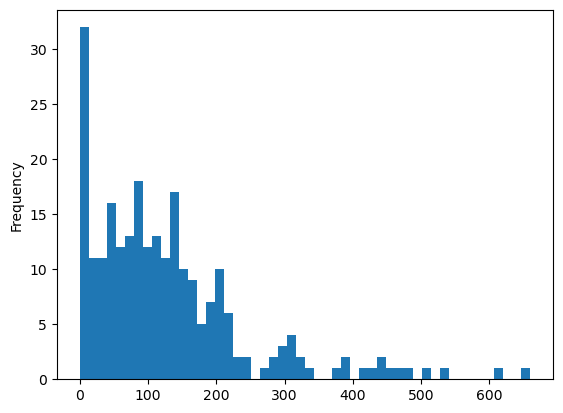

In [39]:
# plot it as a historgram with 50 bins
df2['No Health Insurance Coverage'].plot.hist(bins=50)

<AxesSubplot: >

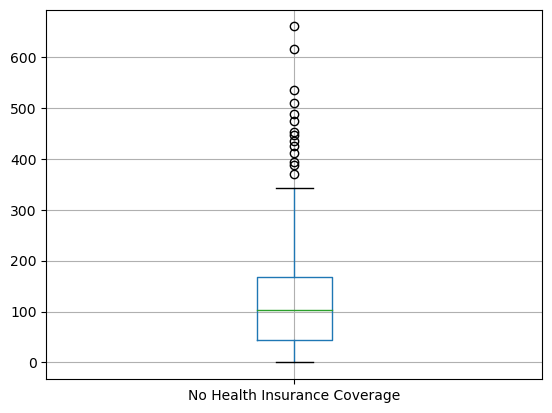

In [42]:
df2.boxplot(column=['No Health Insurance Coverage'])

<AxesSubplot: xlabel='With Health Insurance Coverage', ylabel='Public Health Coverage'>

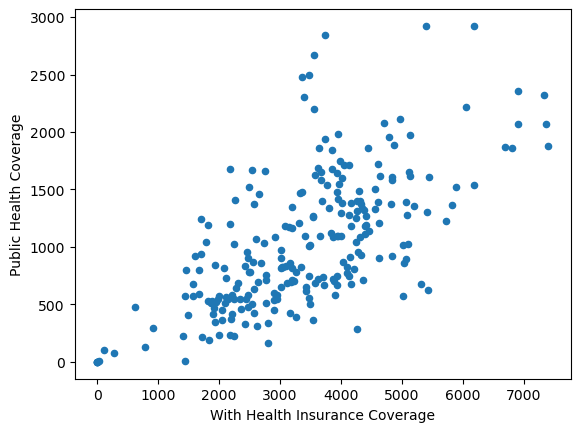

In [44]:
df2.plot.scatter(x='With Health Insurance Coverage',y='Public Health Coverage')

## SORTING DATA ## 
I am now going to look for which census tracts have the highest number of insured individuals and which have the highest number of uninsured individuals.

In [45]:
df_sorted = df2.sort_values(by='With Health Insurance Coverage',ascending = False)

In [46]:
df_sorted[['FIPS','With Health Insurance Coverage']].head(10)

,FIPS,With Health Insurance Coverage
197,06075035300,7403
219,06075060701,7373
198,06075035400,7333
169,06075030700,6909
150,06075026100,6906
182,06075032700,6808
171,06075030900,6690
174,06075031201,6192
173,06075031100,6178
146,06075026001,6051


<AxesSubplot: xlabel='FIPS'>

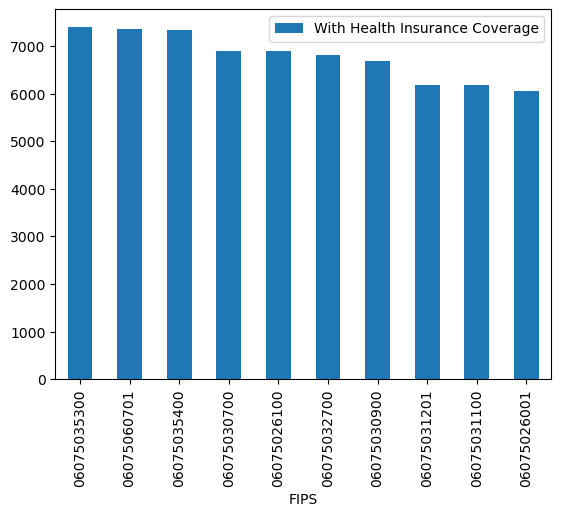

In [47]:
df_sorted.head(10).plot.bar(x='FIPS',
                            y='With Health Insurance Coverage')

In [48]:
df_sorted = df2.sort_values(by='No Health Insurance Coverage',ascending = False)

In [49]:
df_sorted[['FIPS','No Health Insurance Coverage']].head(10)

,FIPS,No Health Insurance Coverage
150,06075026100,660
123,06075022901,616
91,06075017903,536
129,06075023103,510
122,06075022803,488
148,06075026003,475
36,06075012502,452
141,06075025600,447
198,06075035400,436
126,06075023001,426


<AxesSubplot: xlabel='FIPS'>

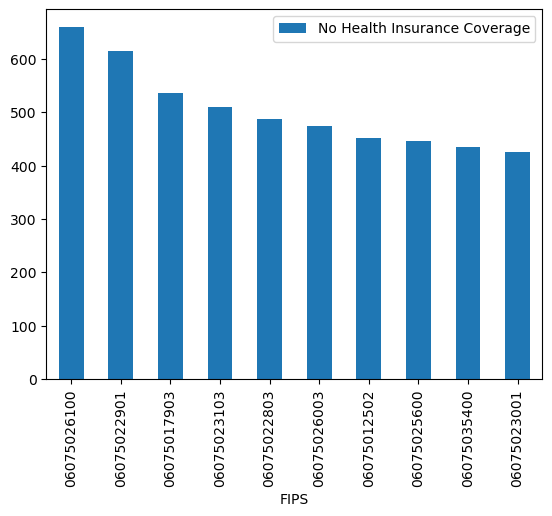

In [51]:
df_sorted.head(10).plot.bar(x='FIPS',
                            y='No Health Insurance Coverage')

<AxesSubplot: title={'center': 'Top 10 Census Tracts with Highest Number of Uninsured Individuals in San Francisco County, 2020'}, ylabel='FIPS'>

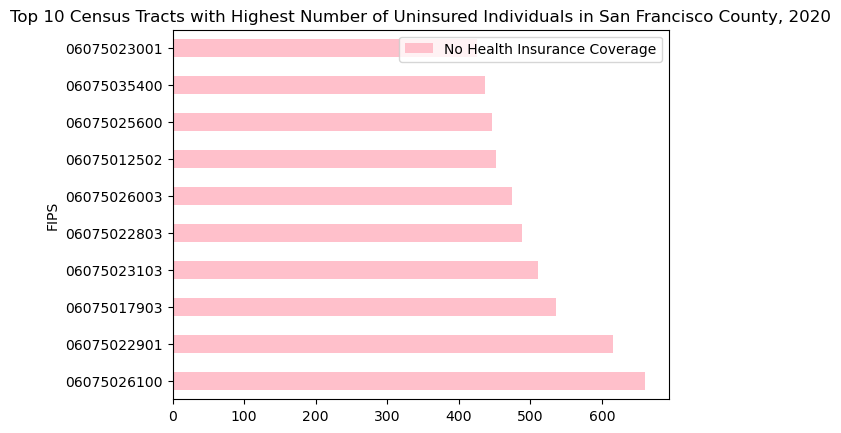

In [52]:
# Make it prettier with a title
df_sorted.head(10).plot.barh(x='FIPS',
                            y='No Health Insurance Coverage', 
                            title='Top 10 Census Tracts with Highest Number of Uninsured Individuals in San Francisco County, 2020',
                            color='pink')

## FILTERING & SUBSETTING DATA ##
I am curious which census tracts have no people.

In [58]:
df2[df2['Total']== 0]

,FIPS,Total,No Health Insurance Coverage,With Health Insurance Coverage,Public Health Coverage,Private Health Insurance
236,06075980200,0,0,0,0,0
238,06075980401,0,0,0,0,0
242,06075990100,0,0,0,0,0
243,06075990200,0,0,0,0,0


In [63]:
df2[df2['No Health Insurance Coverage']== 510]

,FIPS,Total,No Health Insurance Coverage,With Health Insurance Coverage,Public Health Coverage,Private Health Insurance
129,06075023103,4064,510,3554,2670,1144


I want to figure out how to see which census tracts have over a certain percentage of insurance people vs. not insured. 

## MAPPING! ##

In [66]:
import geopandas as gpd

In [67]:
# read in a geojson file downloaded from Open Data SF
tracts=gpd.read_file('week03 data/Census 2020_ Tracts for San Francisco.geojson')

In [70]:
tracts.info

<bound method DataFrame.info of         name      intptlon    awater  mtfcc      aland              namelsad  \
0    9805.01  -122.4193463    9769.0  G5020  1471536.0  Census Tract 9805.01   
1     171.02  -122.4504754       0.0  G5020   294894.0   Census Tract 171.02   
2     123.02  -122.4120970       0.0  G5020    92653.0   Census Tract 123.02   
3     168.01  -122.4290133       0.0  G5020   226534.0   Census Tract 168.01   
4     119.02  -122.4098067       0.0  G5020    93053.0   Census Tract 119.02   
..       ...           ...       ...    ...        ...                   ...   
239   202.01  -122.4240946       0.0  G5020   140617.0   Census Tract 202.01   
240   615.08  -122.3863814  152297.0  G5020   227943.0   Census Tract 615.08   
241   130.01  -122.4272277       0.0  G5020   181456.0   Census Tract 130.01   
242   102.01  -122.4212147       0.0  G5020   186873.0   Census Tract 102.01   
243   111.01  -122.4192656       0.0  G5020   121412.0   Census Tract 111.01   

    tra

In [71]:
tracts.head()

,name,intptlon,awater,mtfcc,aland,namelsad,tractce,statefp,data_loaded_at,intptlat,funcstat,countyfp,data_as_of,geoid,geometry
0,9805.01,-122.4193463,9769.0,G5020,1471536.0,Census Tract 9805.01,980501,06,2022-03-04,+37.7162081,S,075,2021-02-01,06075980501,"MULTIPOLYGON (((-122.42722 37.71555, -122.4271..."
1,171.02,-122.4504754,0.0,G5020,294894.0,Census Tract 171.02,017102,06,2022-03-04,+37.7654353,S,075,2021-02-01,06075017102,"MULTIPOLYGON (((-122.45321 37.76825, -122.4516..."
2,123.02,-122.4120970,0.0,G5020,92653.0,Census Tract 123.02,012302,06,2022-03-04,+37.7870222,S,075,2021-02-01,06075012302,"MULTIPOLYGON (((-122.41500 37.78745, -122.4133..."
3,168.01,-122.4290133,0.0,G5020,226534.0,Census Tract 168.01,016801,06,2022-03-04,+37.7713309,S,075,2021-02-01,06075016801,"MULTIPOLYGON (((-122.43235 37.77378, -122.4308..."
4,119.02,-122.4098067,0.0,G5020,93053.0,Census Tract 119.02,011902,06,2022-03-04,+37.7909959,S,075,2021-02-01,06075011902,"MULTIPOLYGON (((-122.41246 37.79163, -122.4117..."


In [107]:
# plot it!
tracts.plot(figsize=(12,10))

AttributeError: 'list' object has no attribute 'plot'

In [106]:
# tell me more about this dataset
tracts.info(verbose=True, show_counts=True)

AttributeError: 'list' object has no attribute 'info'

In [104]:
# we only really need FIPS and geometry, so let's subset the data
tracts = tracts[['FIPS','geometry']]

TypeError: list indices must be integers or slices, not list

AttributeError: 'list' object has no attribute 'head'